In [ ]:

# Residual square sum = Mean squared error -  (sum(error diff)^2)/n - squared because it is differentiable
# Average model
# R square - coefficient of determination = (1- SS residual)/ (SS total (average model))

In [ ]:
# MODEL INTERPRETABILITY - best feature, worst feature, weights etc

In [1]:
import datetime as dt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# FROM PREVIOUS CLASS

import datetime as dt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

# Preprocessing

df_car=pd.read_csv(r"C:\Users\Mayank Bhatia\Documents\GitHub\DSML\13_intro_to_ml_nn\13.2_intro_to_ml_ml_linear_regression_1\cars24-car-price-cleaned.csv")

def target_encoding(df,tar,var):
    df[var]=df.groupby([var])[tar].transform('mean')
    return df

target_encoding(df_car,'selling_price','make')
target_encoding(df_car,'selling_price','model')

# scaling
import sklearn.linear_model
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_car_scaled=pd.DataFrame(scaler.fit_transform(df_car),columns=df_car.columns)

# splitting

from sklearn.model_selection import train_test_split

y=df_car_scaled['selling_price']
x=df_car_scaled.drop('selling_price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Training

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train,y_train)

print(lm.score(x_train,y_train))
print(lm.score(x_test,y_test))

0.9457591024750988
0.9458843076992296


<Axes: xlabel='feature', ylabel='coeff'>

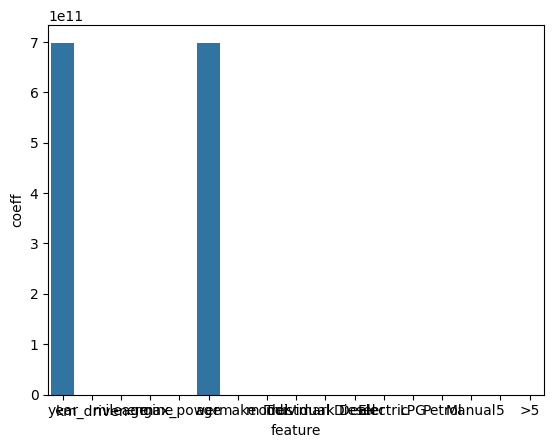

In [70]:
# Feature importance
df_coeff=pd.DataFrame({'feature':x_train.columns,'coeff':lm.coef_})

# most important feature:
df_coeff.loc[df_coeff['coeff']==(df_coeff["coeff"].max())]

# least important feature:
df_coeff.loc[df_coeff['coeff']==(df_coeff["coeff"].min())]

# barplot

sns.barplot(x='feature',y='coeff',data=df_coeff)




# Creating my own linear regression model

In [ ]:
'''
how does gradient descent work: Imagine a quadratic curve for a loss function for each of the Ws. 
    Minimum of these respective loss functions for each Ws will be at slope(derivative)=0.
    Now, for each W, we want to start at random value of W and move towards 0 slope (derivative)
    Imagine, 1 single W, if slope is positive, value of w needs to be reduced and if slope  is negative, W needs to be increased (ref 1)
    In fact, bigger the value of slope(derivative), farther it is from minima point.
    to achieve ref 1 , we subtract value of slope*factor from the current w
    As an example for previous line, lets assume, minimum slope comes at w=2 and we are standing at w=7, 
        slope will be very positive (lets say 2) and to move towards 2, we subtract 2*0.1 (0.2) from 7 which is equal to 6.8. 
        Now slope will be lesser (lets say) for w=6.8, (lets say 1.8) and hence we will subtract 0.18 from 6.8
        Notice that steps are getting smaller and smaller as we move towards minima point

loss function: sum((y-y_hat)*2)/n = sum((y-(wT.x+w0))*2)/n = sum((y-(w1x1+w2x2+w3x3+----+w0))*2)/n

Now to move towards values of w for minimum y, we do partial differentiation for y wrt w

dy/dw1 = sum(2*(y-(wTx+w0))*(-x1))/n
dy/dw2 = sum(2*(y-(wTx+w0))*(-x2))/n
----
dy/dw0= sum(2*(y-(wTx+w0))*(-1))/n

Now, for every iteration, we need to subtract nw' from w: w-nw'

'''

In [4]:
# defining function to predict y values from current regression line

# THIS GIVES US VALUES OF Y IN A SERIES FORMAT

def pred_y(w,w0,x):
    y=np.dot(x,w)+w0
    return (y)

In [5]:
# defining function to define accuracy

def accu(y,y_pred):
    ss_res=np.sum((y-y_pred)**2)
    ss_mean=np.sum((y-np.mean(y))**2)
    accuracy = 1-ss_res/ss_mean
    return (accuracy)


# Manual Implementation

In [18]:
# print(x_train.info(),y_train.info())
w=np.zeros(shape=x_train.shape[1])
w0=0
k=0.1

y_pred=pred_y(w,w0,x_train)
print(accu(y_train,y_pred)) # accuracy is in negative and hence very bad

w_diff=(-2)*(x_train.T.dot((y_train-y_pred)))/(y_train.shape[0]) # this sums y diff for each record of respective w
w0_diff=(-2)*(y_train-y_pred)/(y_train.shape[0])

w_2=w-k*w_diff
w0_2=w0-k*w0_diff

y_pred_2=pred_y(w_2,w0_2,x_train)
print(accu(y_train,y_pred_2))


# # 2nd iteration

# w_diff_2=(-2)*(x_train.T.dot((y_train-y_pred_2)))/(y_train.shape[0])
# w0_diff_2=(-2)*(y_train-y_pred_2)/(y_train.shape[0])

# w_3=w_2-k*w_diff_2
# w0_3=w0_2-k*w0_diff_2

# y_pred_3=pred_y(w_3,w0_3,x_train)
# print(accu(y_train,y_pred_3))


print(w0_2)


-1.6859292607025385
-0.31629242576614214
9637     0.000002
4266     0.000014
6483     0.000005
10024    0.000003
7122     0.000003
           ...   
10955    0.000004
17289    0.000003
5192     0.000002
12172    0.000003
235      0.000002
Name: selling_price, Length: 13874, dtype: float64


# Converting manual implementation into a function

In [19]:
# defining function to predict y values from current regression line

def pred_y(w,w0,x):
    y=np.dot(x,w)+w0
    return (y)

# defining function to define accuracy

def accu(y,y_pred):
    ss_res=np.sum((y-y_pred)**2)
    ss_mean=np.sum((y-np.mean(y))**2)
    accuracy = 1-ss_res/ss_mean
    return (accuracy)


In [ ]:
# k=learning rate

# NOTE THAT IN BELOW CODE FOR w0_DIFF, YOU SHOULD DO NP.SUM BECAUSE IT SHOULD BE A SINGLE NUMBER

def lin_reg(x,y,iter=100,k=0.1):
    w=np.zeros(shape=x.shape[1])
    w0=0
    map_accu=np.zeros(iter)
    for i in range(iter):
        y_pred=pred_y(w,w0,x)   
        print('value of accuracy for iteration ',i,' is ',accu(y,y_pred))
        map_accu[i]=accu(y,y_pred)
        w_diff=(-2)*(x.T.dot((y-y_pred)))/(y.shape[0])
        w0_diff=(-2)*(y-y_pred)/(y.shape[0])
        w=w-k*w_diff
        w0=w0-k*w0_diff
        y_pred=pred_y(w,w0,x)   
        print('value of updated accuracy for iteration ',i,' is ',accu(y,y_pred))      
    return(w,w0,map_accu)

value of accuracy for iteration  0  is  -1.6859292607025385
value of updated accuracy for iteration  0  is  -0.31629242576614214
value of accuracy for iteration  1  is  -0.31629242576614214
value of updated accuracy for iteration  1  is  -0.022310605903841596
value of accuracy for iteration  2  is  -0.022310605903841596
value of updated accuracy for iteration  2  is  0.08722067304797165
value of accuracy for iteration  3  is  0.08722067304797165
value of updated accuracy for iteration  3  is  0.159278928219299
value of accuracy for iteration  4  is  0.159278928219299
value of updated accuracy for iteration  4  is  0.21899575992595344
value of accuracy for iteration  5  is  0.21899575992595344
value of updated accuracy for iteration  5  is  0.27139568094798416
value of accuracy for iteration  6  is  0.27139568094798416
value of updated accuracy for iteration  6  is  0.3180575497699878
value of accuracy for iteration  7  is  0.3180575497699878
value of updated accuracy for iteration  7  

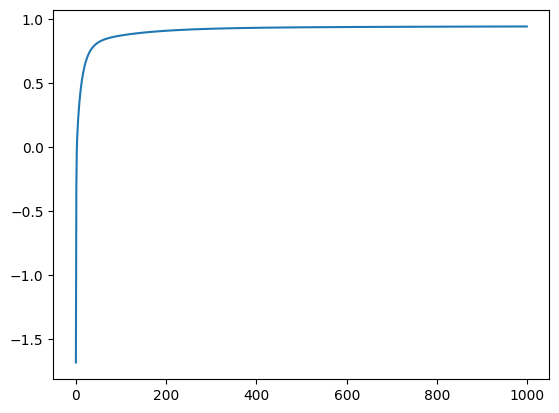

In [21]:
w,w0,plotaccu=lin_reg(x_train,y_train,iter=1000)

# plotting accuracy

plt.plot(plotaccu)

# Problems

In [ ]:
#4
'''
Given the training data, train a linear regression model and return the weights(coefficients) and w0(intercept).
'''

In [3]:
import numpy as np


#import Linear Regression class from scikit-learn library
from sklearn.linear_model import LinearRegression

def coefficientsAndIntercept(xTrain, yTrain):
  # convert lists into numpy array
  X_train = np.asarray(xTrain)
  y_train = np.asarray(yTrain)
  
  # initialize linear regression
  regressor = LinearRegression()

  # fit the model
  regressor.fit(xTrain, yTrain)

  #return coefficients and intercepts rounded off upto 2 decimal digits
  return (np.round(regressor.coef_, 2)),(np.round(regressor.intercept_, 2))

In [ ]:
#5 
'''
Given the data:
1. x where x[i] represents the values of independent variables for each ith sample
2. y where y[i] represents the value of the dependent variable for ith sample
3. w represents the intial value of weights
4. alpha represents the learning rate
5. nitr represents the number of iterations
Complete the program to calculate the updated values of weights after nitr iterations of batch gradient descent.
'''

In [ ]:
import numpy as np
def gradient_descent(x, y, w, alpha, nitr):

  x = np.asarray(x)
  y = np.asarray(y)
  w = np.asarray(w)

  xTrans = x.transpose()
  #Perform Gradient descent on data nitr times
  for i in range(0, nitr):
    # calculate the y_pred for x and w
    y_pred = np.dot(x, w)

    # Calculate the difference between y_pred and y
    loss = y_pred - y

    #average the gradient
    gradient = np.dot(xTrans, loss) / len(y)

    #Update the weights and bias
    w = w - alpha * gradient

  return np.round(w,2)